# Estruturas de Seleção (Parte 2)

```
(*) Caderno preparado pelo Prof. Edson Pimentel
```

## Base de Dados - Pacientes

Os exemplos deste caderno farão uso da base de dados pacientes.

In [ ]:
import pandas as pd 
# Base de Dados de Pacientes
#https://drive.google.com/file/d/1foZsAIE3sSoFf53ENs9QCQ29ZqcMOxac/view?usp=sharing
codigo = "1foZsAIE3sSoFf53ENs9QCQ29ZqcMOxac"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
pac = pd.read_csv(file, sep = ";",decimal=",")
print(pac.head())

   Ident  Idade  Altura  Peso  ...  Sistolica  Diastolica  Colesterol   IMC
0      1     58    1.80  76.1  ...        125          78         522  23.5
1      2     22    1.68  64.9  ...        107          54         127  23.0
2      3     32    1.82  80.7  ...        126          81         740  24.3
3      4     31    1.74  79.1  ...        110          68          49  26.0
4      5     28    1.72  68.7  ...        110          66         230  23.3

[5 rows x 9 columns]


## Problema 1

Retomemos o problema de dizer se a moda de um atributo é **única ou bimodal**. 

Escreva instruções para exibir a moda de um determinado atributo. O nome do atributo (coluna) será informado pelo usuário.

Além de exibir a moda deve-se também exibir uma das seguintes mensagens: 
* `Unimodal!`.
* `Bimodal!`.

[Atenção]: 
* mode() retorna a moda
* mode().count() retorna a quantidade de elementos "da moda".

### Solução do Problema 1

In [ ]:
# Solução Problema [1]
coluna = input("Digite a coluna: ")
moda = pac[coluna].mode()
print("moda do atributo ", coluna, " = ", moda)
if  (moda.count() == 1) :
  print("Unimodal!")
else:
  print("Bimodal!")

Digite a coluna: IMC
moda do atributo  IMC  =  0    24.3
1    32.8
dtype: float64
Bimodal!


Execute a solução acima 2 vezes:

* Informe Idade na primeira execução
* Informe Pulsacao na segunda execução

Note que:
* Na primeira execução (Idade) a mensagem exibida é "Unimodal!".
* Na segunda execução (Pulsacao) a mensagem exibida foi "Bimodal!"

Agora tente execurar o código abaixo para o atributo `Peso`.

In [ ]:
# Solução Problema [1]
coluna = input("Digite a coluna: ")
moda = pac[coluna].mode()
print("moda do atributo ", coluna, " = ", moda)
if  (moda.count() == 1) :
  print("Unimodal!")
else:
  print("Bimodal!")

Digite a coluna: Peso
moda do atributo  Peso  =  0      60.8
1      61.8
2      62.6
3      64.9
4      68.1
5      68.7
6      70.3
7      73.9
8      74.7
9      75.1
10     76.1
11     78.8
12     79.1
13     79.5
14     80.7
15     84.0
16     86.0
17     90.7
18     94.2
19     99.3
20    106.7
dtype: float64
Bimodal!


### Nem Unimodal e nem Bimodal

Note que a execução acima mostrou a `mensagem "Bimodal"`. Mas, foram exibidos 21 números! E não apenas 2 números. **Portanto, a moda de "Peso" não é Bimodal (e nem Unimodal).**

De fato, como a tabela tem 21 linhas (ocorrências) e a frequência de "Peso" é igual a "1" para todos os pesos, o correto é dizer que **"Não há moda"**, ou seja, não há uma frequência máxima.

Assim, a `estutura de seleção composta` não é suficiente para lidar com este tipo de problema.

## Problema [2]
`Antes de mostrar a solução adequada vamos revisar o enunciado.`

Escreva instruções para exibir a moda de um determinado atributo, **se houver moda**. O nome do atributo (coluna) será informado pelo usuário.

Havendo moda, deve-se também exibir uma das seguintes mensagens:
* Unimodal!
* Bimodal!
* Há mais de 2 modas!

### Solução do Problema 2

In [ ]:
# Solução Problema [2]
coluna = input("Digite a coluna: ")
quant = pac[coluna].count()   # conta quantas linha existem
moda = pac[coluna].mode()     # obtém a moda da "coluna"
qmoda =  moda.count()         # obtém a quantidade de "moda"
if  ( qmoda == quant) :
  print("Não há moda!")
else:
  print("moda do atributo ", coluna, " = ", moda)  # exibe a moda
  if (qmoda == 1):
    print("Unimodal")
  else: 
    if (qmoda == 2):
      print("Bimodal!")
    else:
      print("Há mais de duas modas")

Digite a coluna: IMC
moda do atributo  IMC  =  0    24.3
1    32.8
dtype: float64
Bimodal!


[ATENÇÃO]: Nesta tabela paciente, a moda é =1, ou =2, ou não há moda. Veja abaixo.

In [ ]:
# Mostra todas as modas
pac.mode()

Veja a seguir a estrutura geral da Seleção Encadeada.

## Seleção Encadeada (if / else /if /else)

A `seleção encadeada` tem a seguinte estrutura:

```
if condicao:
  comandos
  comandos
  comandos
else:
  comandos
  if condicao:
    comandos
    comandos
  else:
    comandos
    comandos
```

[Observações]:
* Cada **``else``** está associado a um **``if``** específico. Esta correspondência se dá em virtude do "alinhamento" (deslocamento)
* Os "comandos" dentro de cada **``if``** ou **``else``** também são identificados pelo "deslocamento a direita" em cada bloco


## Problema [3]

Escreva instruções para exibir a correlação entre IMC e um determinado atributo a ser informado pelo usuário.

Independente se correlação negativa ou positiva, emitir mensagem adequada, de acordo com o valor da correlação conforme tabela abaixo:

* 0.00 a 0.19 - Correlação bem fraca.
* 0.20 a 0.39 - Correlação fraca.
* 0.40 a 0.69 - Correlação moderada.
* 0.70 a 0.89 - Correlação forte.
* 0.90 a 1.00 - Correlação muito forte.

### Solução do Problema 3

In [ ]:
# Solução Problema [3]
coluna = input("Digite a coluna: ")
cor = pac['IMC'].corr(pac[coluna])  # obtém a correlação entre IMC e coluna
print("Correlação entre IMC e", coluna, " = %.4f" % cor)
acor = abs(cor)  # obtém o valor absoluto (sem sinal)

if  (acor < 0.20) :
  print("Bem Fraca")
else:
  if (acor < 0.40):
    print("Fraca")
  else: 
    if (acor < 0.70):
      print("Moderada")
    else:
      if (acor < 0.90):
        print("Forte")
      else:
        print("Muito Forte")

Digite a coluna: Altura
Correlação entre IMC e Altura  = -0.1802
Bem Fraca


Execute a solução acima 3 vezes:

* [1] Informe Peso e veja que o resultado é **Forte**
* [2] Informe Altura e veja que o resultado é **Bem Fraca**
* [3] Informe Diastolica e veja que o resultado é **Moderada**

Note que quando há muitas opções o encadeamento vai gerando um "grande" deslocamento para a direita.

Há uma outra estrutura de seleção (em Python) que também permite este encadeamento com muitas opções.

## Seleção Múltipla (if / elif)

A `seleção múltipla` tem a seguinte estrutura:

```
if condicao:
  comandos
  comandos
  comandos
elif condicao:
  comandos
  comandos
elif condicao:
  comandos
  comandos
else:
  comandos
  comandos
```

[Observações]:
* O funcionamento é similar ao do `if / else /if / else` 
* A principal diferença está no alinhamento (deslocamentos). Note que mesmo havendo "múltiplas" opções só há 1 nível de deslocamento.
* O `else` (ao final) somente é executado se nenhum `elif` for verdadeiro.


Vejamos a solução do Problema [3] agora com o uso do `elif`

### Solução do Problema 3 com elif

In [ ]:
# Solução Problema [3]
coluna = input("Digite a coluna: ")
cor = pac['IMC'].corr(pac[coluna])  # obtém a correlação entre IMC e coluna
print("Correlação entre IMC e", coluna, " = %.4f" % cor)
acor = abs(cor)  # obtém o valor absoluto (sem sinal)

if  (acor < 0.20) :
  print("Bem Fraca")
elif (acor < 0.40):
  print("Fraca")
elif (acor < 0.70):
  print("Moderada")
elif (acor < 0.90):
  print("Forte")
else:
  print("Muito Forte")

Digite a coluna: Peso
Correlação entre IMC e Peso  = 0.7639
Forte


Execute a solução acima 3 vezes:

* [1] Informe Peso e veja que o resultado é **Forte**
* [2] Informe Altura e veja que o resultado é **Bem Fraca**
* [3] Informe Diastolica e veja que o resultado é **Moderada**

Note que a solução usando elif tem uma estrutura com menos deslocamentos. Isto é melhor visualizado na imagem a seguir:


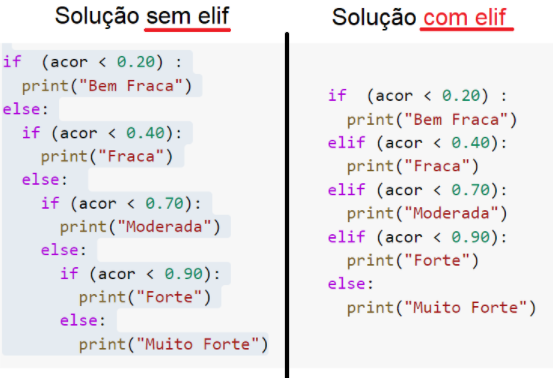

## Exercícios

### Exercício 1

Escreva instruções para exibir uma das seguintes medidas de tendência central do IMC: média, mediana ou moda.
O usuário deverá digitar a opção, ou seja, um número 1, 2 ou 3, sendo:
* 1 para ver a média
* 2 para ver a mediana
* 3 para ver a moda


In [ ]:
# Digite sua solução aqui

### Exercício 2

As instruções abaixo calculam a média do Peso, e a variação entre o maior e menor valor do Peso em relação a esta média.


In [ ]:
coluna = 'Peso'
media = pac[coluna].mean()   # obtém a média
desvio= pac[coluna].std()   # obtém o desvio padrão
menor = pac[coluna].min()   # obtém o menor valor
maior = pac[coluna].max()   # obtém o maior valor
varmax = maior - media      # obtém a distância entre maior e média
varmin = media - menor      # obtém a distância entre média e menor
pvarmax = (varmax*100)/media  # calcula a variação percentual do maior valor em relação a média (regra de três)
pvarmin =  (varmin*100)/media  # calcula a variação percentual do menor valor em relação a média (regra de três)
print(coluna, "==>")
print("Média:%.2f" % media, "Maior:" ,maior, "Menor:", menor, "Desvio Padrão: %.2f" % desvio)
print("Variação Percentual Maior x Média = %.2f" % pvarmax  )
print("Variação Percentual Menor x Média = %.2f" % pvarmin  )

Peso ==>
Média:77.90 Maior: 106.7 Menor: 60.8 Desvio Padrão: 12.38
Variação Percentual Maior x Média = 36.96
Variação Percentual Menor x Média = 21.96


Note que a diferença entre as duas variações é de aproximadamente 15 unidades percentuais (`36.96 - 21.96 = 15`)

Complemente o programa acima com instruções para:
* exibir a o valor abstoluto (sem sinal) da diferença entre as duas variações
* exibir uma das seguintes mensagens de acordo com a diferença entre as duas variações percentuais (independentemente do sinal positivo ou negativo).

>* \< 5   : "Diferença MUITO BAIXA": 
* \>= 5 e < 9 : "Diferença BAIXA" 
* \>= 9 e < 15: "Diferença MÉDIA" 
* \>= 15 e < 21: "Diferença ALTA" 
* \>= 21: "Diferença MUITO ALTA" 

In [ ]:
# Digite sua solução aqui

Execute sua solução para outras colunas. Para tal, basta trocar a linha coluna = "Peso" por  coluna = input("Digite a coluna":)

* Sistolica ==> Alta
* Diastolica ==> Muito Alta
* Altura ==> Muito Baixa
* Pulsacao ==> Baixa